In [4]:
!pip install matplot

In [92]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.2/9.2 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.2 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.2 MB 6.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.2 MB 8.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.2 MB 8.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.2 MB 8.9 MB/s eta 0:00:01
   ------------- ----------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# loading the dataset

In [2]:
train = pd.read_csv('train.csv')


In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# exploratory data analysis

<Axes: xlabel='Survived', ylabel='count'>

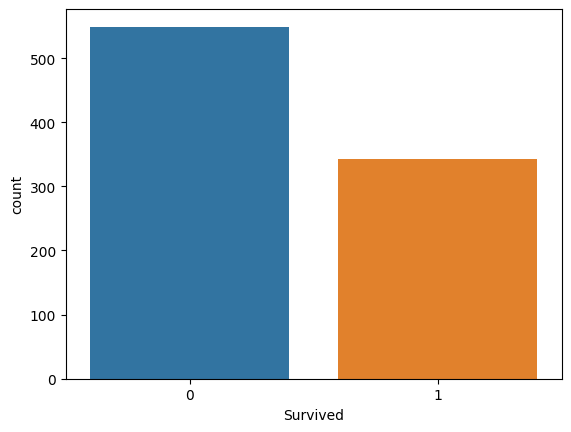

In [7]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Pclass', ylabel='count'>

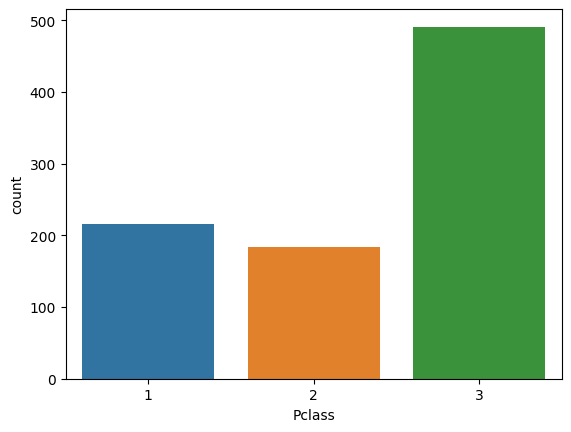

In [8]:
sns.countplot(x = 'Pclass', data = train)

<Axes: xlabel='Sex', ylabel='count'>

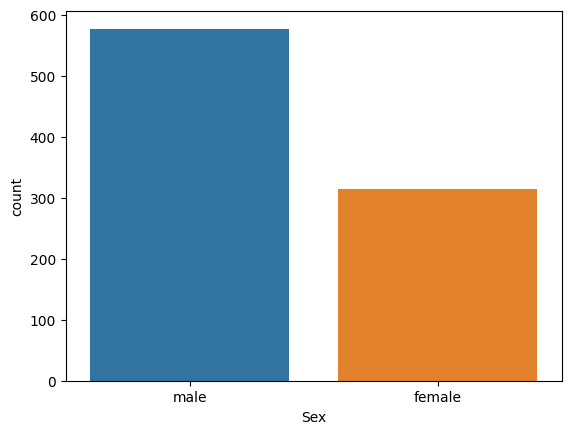

In [9]:
sns.countplot(x = 'Sex', data = train)

<Axes: xlabel='SibSp', ylabel='count'>

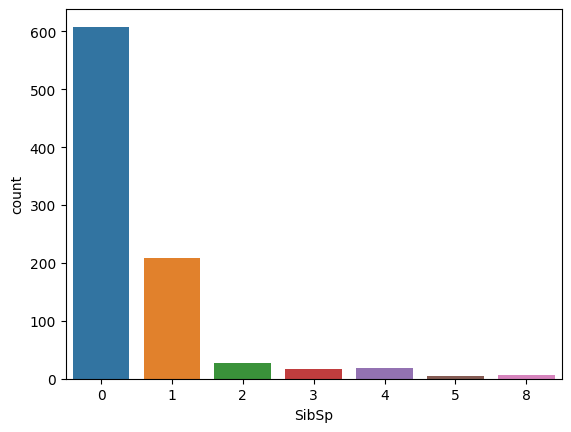

In [10]:
sns.countplot(x = 'SibSp', data = train)

<Axes: xlabel='Parch', ylabel='count'>

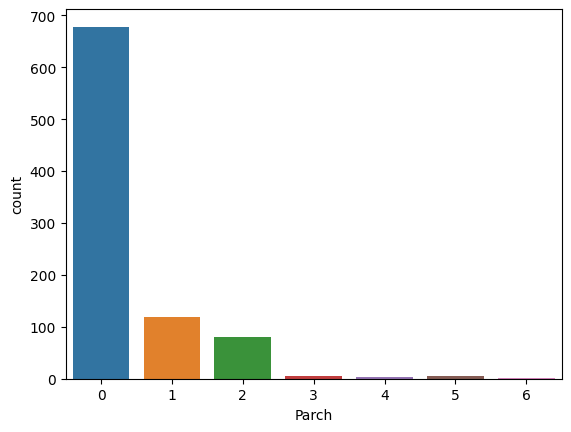

In [11]:
sns.countplot(x = 'Parch', data = train)

<Axes: xlabel='Embarked', ylabel='count'>

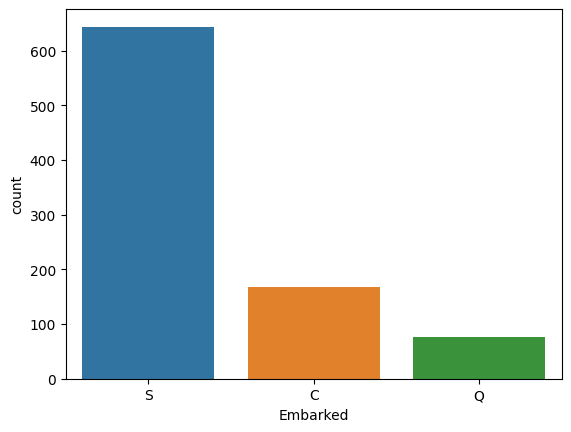

In [12]:
sns.countplot(x = 'Embarked', data = train)

# numerical attributes

In [13]:
'''
In summary, the main difference between countplot and distplot is the type of data they 
are designed to visualize:

countplot is for categorical data and shows the count of unique categories.

distplot is for continuous numerical data and shows the distribution of values along with 
an estimation of the probability density function.

You should choose the appropriate plot based on the nature of your data and the specific 
insights you want to gain from your visualization.
'''

'\nIn summary, the main difference between countplot and distplot is the type of data they \nare designed to visualize:\n\ncountplot is for categorical data and shows the count of unique categories.\n\ndistplot is for continuous numerical data and shows the distribution of values along with \nan estimation of the probability density function.\n\nYou should choose the appropriate plot based on the nature of your data and the specific \ninsights you want to gain from your visualization.\n'

<Axes: xlabel='Age', ylabel='Density'>

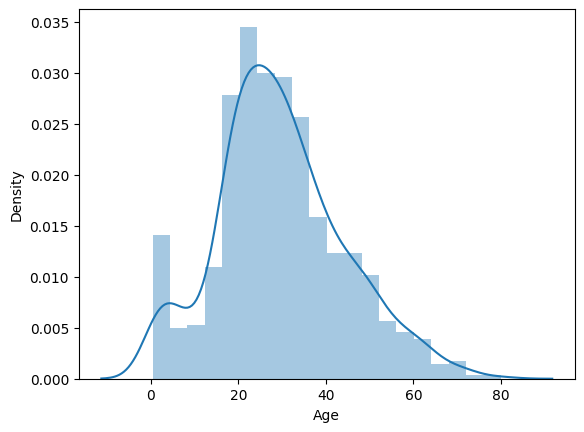

In [14]:
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

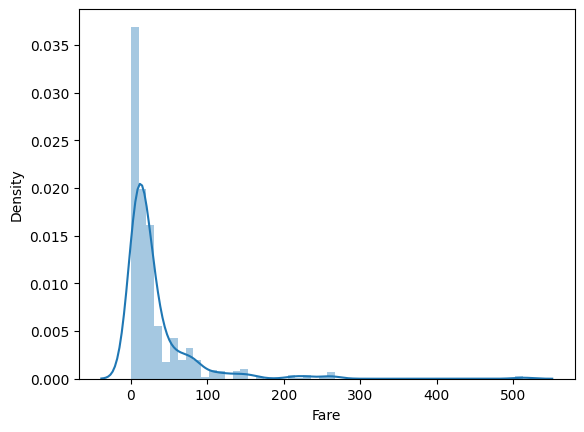

In [15]:
sns.distplot(train['Fare'])

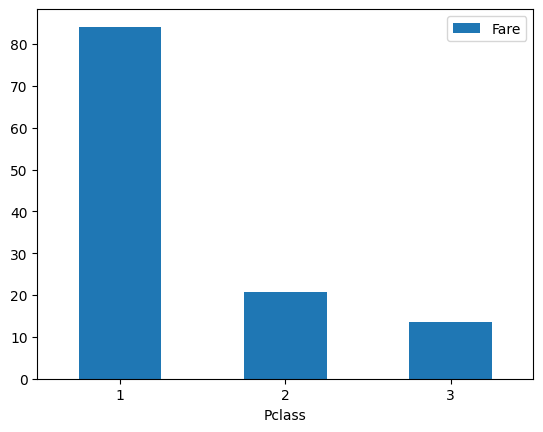

In [16]:
class_fare = train.pivot_table(index = 'Pclass', values = 'Fare')
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.xticks(rotation = 0)
plt.show()

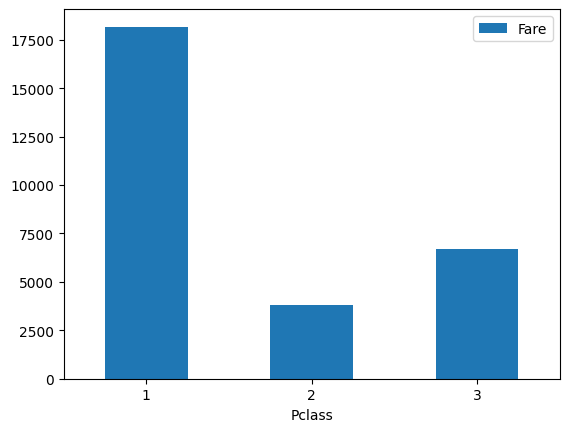

In [17]:
# this is for the total fare

class_fare = train.pivot_table(index = 'Pclass', values = 'Fare', aggfunc = np.sum)
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.xticks(rotation = 0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

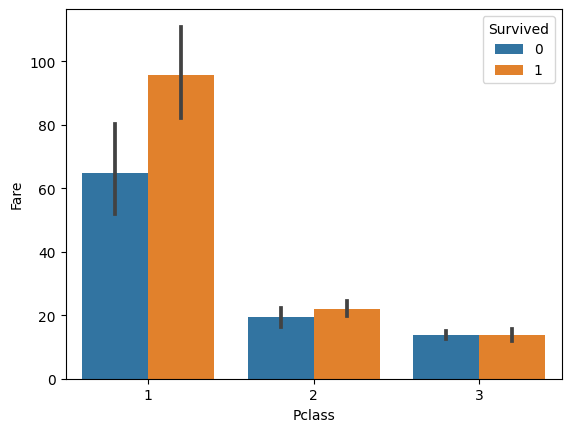

In [18]:
sns.barplot(data = train, x = 'Pclass',y = 'Fare', hue = 'Survived')

# this is for making the barplot
# hue here is used to color the barplot

<Axes: xlabel='Survived', ylabel='Fare'>

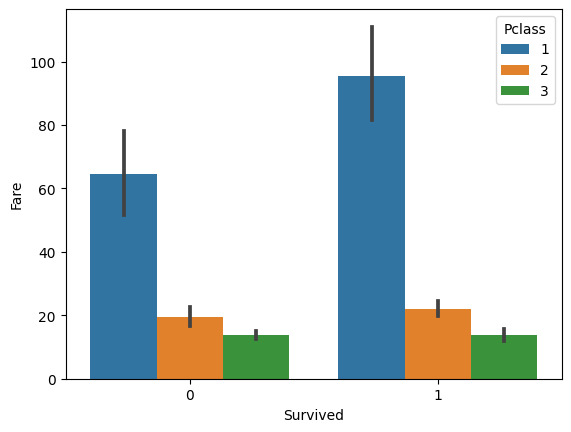

In [19]:
sns.barplot(data = train, x = 'Survived',y = 'Fare', hue = 'Pclass')

# what this barplot tells us is that the number of people who survived and whom did not 
# survive based on their class and fare 

# data pre processing

In [20]:
train_len = len(train)
# combine two data frames
df = pd.concat([train, test], axis = 0)
df = df.reset_index(drop = True )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
# find the null values

In [23]:
train_len

891

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [25]:
# dropping the coloumn cabin
df = df.drop(columns = ['Cabin'], axis = 1)


In [26]:
df['Age'].mean()

29.881137667304014

In [27]:
df['Embarked'].mode()[0]

'S'

In [28]:
# filling the missing values using mean of that column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# log transformation for uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

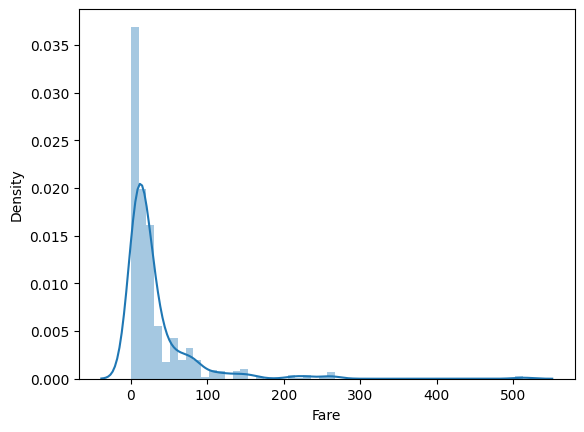

In [29]:
 sns.distplot(train['Fare'])

In [30]:
df['Fare'] = np.log(df['Fare'] + 1)

# what we are doing here is that we are replacing the null values with mean

<Axes: xlabel='Fare', ylabel='Density'>

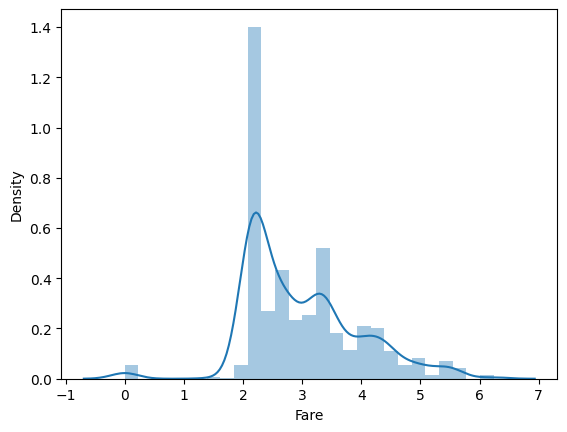

In [31]:
sns.distplot(df['Fare'])

# co relation matrix

<Axes: >

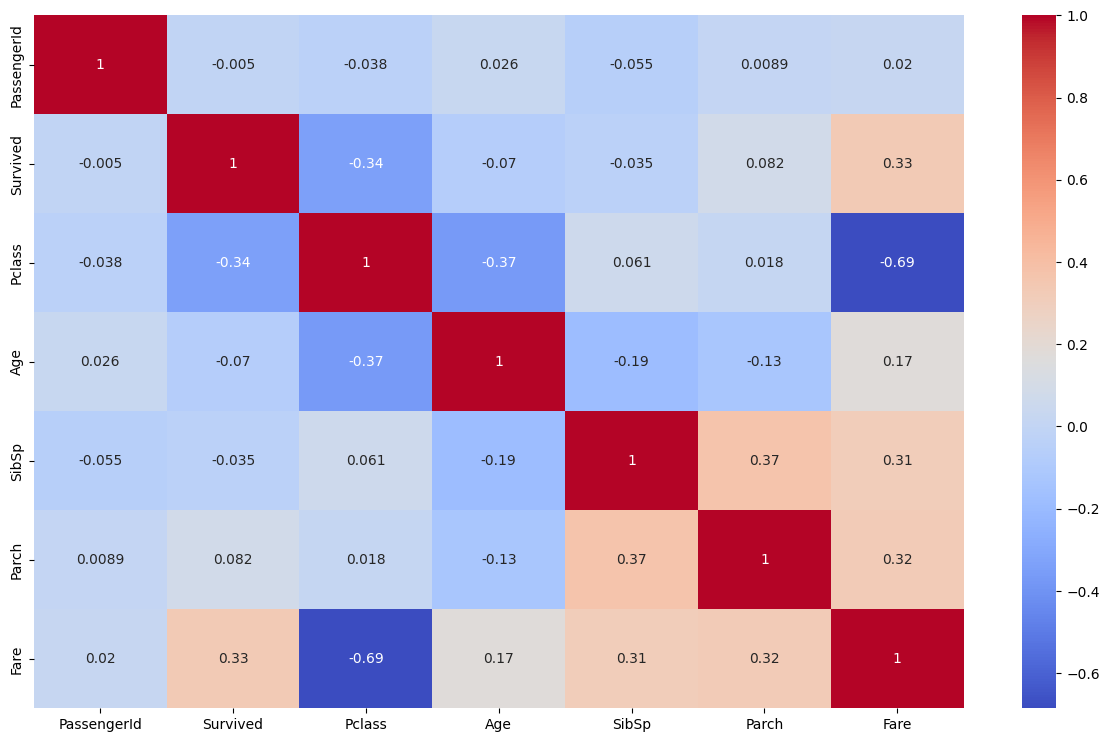

In [32]:
# this will only include the numeric column and remove the non-numeric ones
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# co relation for the numeric column
corr = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')


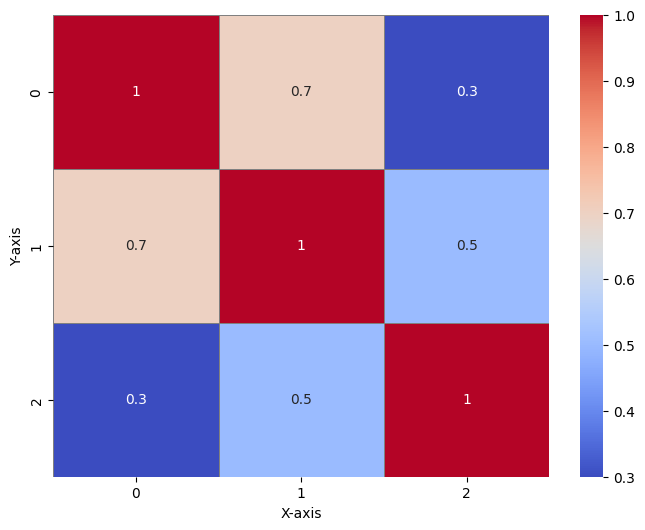

In [33]:
# small example for understanding heatmap

data = [[1, 0.7, 0.3],
        [0.7, 1, 0.5],
        [0.3, 0.5, 1]]

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')

# Add labels to the axes (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the heatmap
plt.show()

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [35]:
df = df.drop(columns = ['Name', 'Ticket'], axis = 1)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
cols = ['Sex', 'Embarked']
le = LabelEncoder()
# what we are doing here is that we are creating an instance of the label encoder class

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [39]:
# now  here what we can see is that the values of sex and embarked which were strings 
# before have been converted to numerical values which can now be used to make and visuali
# properly

# train test split

In [40]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [42]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [43]:
X = train.drop(columns = ['PassengerId', 'Survived'], axis = 1)
y = train['Survived']

In [44]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# model training

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify coloumn

def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    model.fit(X_train, y_train)
    print('Accuracy: ', model.score(X_test, y_test))

    score = cross_val_score(model, X, y, cv = 5)
    print('CV Score: ', np.mean(score))    

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy:  0.8071748878923767
CV Score:  0.7833971502102819


In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy:  0.726457399103139
CV Score:  0.7677044755508129


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)


Accuracy:  0.8026905829596412
CV Score:  0.815956311593748


In [51]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.5/99.7 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 0.9/99.7 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.5/99.7 MB 6.9 MB/s eta 0:00:15
    --------------------------------------- 2.1/99.7 MB 8.0 MB/s eta 0:00:13
   - -------------------------------------- 2.7/99.7 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 3.4/99.7 MB 9.3 MB/s eta 0:00:11
   - -------------------------------------- 4.0/99.7 MB 9.9 MB/s eta 0:00:10
   - --------------------------------

In [57]:
from sklearn.svm import SVC
model = SVC()
classify(model)

Accuracy:  0.6188340807174888
CV Score:  0.6835289686774214


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model)

Accuracy:  0.7802690582959642
CV Score:  0.7744397715146569


In [54]:
import xgboost as xgb

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy:  0.7847533632286996
CV Score:  0.8148327160881301


In [60]:
!pip install lightgbm catboost

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/a7/aed402760cde64ca28b7787ad2a63a3f1d2066c2f058b2d974ce5479e32e/catboost-1.2.1.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751

In [61]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [67]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose = -1)
classify(model)

Accuracy:  0.8116591928251121
CV Score:  0.8238277572029377


In [65]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose = 0)
classify(model)

Accuracy:  0.8295964125560538
CV Score:  0.8226790534178645
